<a href="https://colab.research.google.com/github/HamzaSefiani/API-To-Do-List/blob/main/linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Multiple Linear Regression**
housing price prediction

# The following code creates your `X_train` and `y_train` variables.

In [38]:
import copy, math
import matplotlib.pyplot as plt
import numpy as np

In [19]:
#stored in a NumPy matrix X_train
#𝐗_train is a matrix with dimensions (𝑚, 𝑛) (m rows, n columns).
#𝑚 number of training  (  𝑚 is three in our example), and 𝑛 number of features (four in our example)
# data is stored in numpy array/matrix
X_train = np.array([[2104, 5, 1, 45], [1416, 3, 2, 40], [852, 2, 1, 35]])
y_train = np.array([460, 232, 178])

In [20]:
print(f"X_train shape : {X_train.shape}, X_train type : {type(X_train)}")
print(X_train)
print(f"Y shape : {y_train.shape}, Y_train type : {type(y_train)}")
print(y_train)

X_train shape : (3, 4), X_train type : <class 'numpy.ndarray'>
[[2104    5    1   45]
 [1416    3    2   40]
 [ 852    2    1   35]]
Y shape : (3,), Y_train type : <class 'numpy.ndarray'>
[460 232 178]


#Parameter vector w, b

For demonstration,  𝐰 and  𝑏 will be loaded with some initial selected values that are near the optimal.  𝐰 is a 1-D NumPy vector.

In [10]:
b_init = 785.1811367994083
w_init = np.array([ 0.39133535, 18.75376741, -53.36032453, -26.42131618])
print(f"w_init shape: {w_init.shape}, b_init type: {type(b_init)}")

w_init shape: (4,), b_init type: <class 'float'>


#Model Prediction With Multiple Variables

In [ ]:
#Single Prediction, vector


In [11]:
def predict(x,w,b):
  p = np.dot(x,w) + b
  return p

In [17]:
x_vec = X_train[0,:]
print(x_vec)
f_wb = predict(x_vec, w_init, b_init)
print(f_wb)

[2104    5    1   45]
459.9999976194083


#Compute Cost With Multiple Variables

In [21]:
def comput_cost(X, y, w, b):
  m = X.shape[0]
  cost = 0.0
  for i in range(m):
    f_wb_i = np.dot(X[i], w) + b
    cost = cost + (f_wb_i - y[i])**2
  cost = cost / 2*m
  return cost

In [22]:
print(comput_cost(X_train, y_train, w_init, b_init))

1.4021013986069966e-11


#Compute Gradient with Multiple Variables

In [26]:
def compute_gradient(X,y,w,b):
    m, n = X.shape
    dj_dw = np.zeros((n,))
    dj_db = 0
    for i in range(m):
      err = (np.dot(X[i],w) + b) - y[i]
      for j in range(n):
        dj_dw[j] = dj_dw[j] + err * X[i,j]
      dj_db = dj_db + err
    return dj_db, dj_dw

In [27]:
#Compute and display gradient
tmp_dj_db, tmp_dj_dw = compute_gradient(X_train, y_train, w_init, b_init)
print(f'dj_db at initial w,b: {tmp_dj_db}')
print(f'dj_dw at initial w,b: \n {tmp_dj_dw}')

dj_db at initial w,b: -5.021775450586574e-06
dj_dw at initial w,b: 
 [-8.17870732e-03 -1.88159179e-05 -6.65236735e-06 -2.07721017e-04]


In [35]:
def gradient_descent(X, y, w_in, b_in, cost_function, gradient_function, alpha, num_iters):
    """
    Performs batch gradient descent to learn w and b. Updates w and b by taking
    num_iters gradient steps with learning rate alpha

    Args:
      X (ndarray (m,n))   : Data, m examples with n features
      y (ndarray (m,))    : target values
      w_in (ndarray (n,)) : initial model parameters
      b_in (scalar)       : initial model parameter
      cost_function       : function to compute cost
      gradient_function   : function to compute the gradient
      alpha (float)       : Learning rate
      num_iters (int)     : number of iterations to run gradient descent

    Returns:
      w (ndarray (n,)) : Updated values of parameters
      b (scalar)       : Updated value of parameter
      """

    # An array to store cost J and w's at each iteration primarily for graphing later
    J_history = []
    w = copy.deepcopy(w_in)  #avoid modifying global w within function
    b = b_in

    for i in range(num_iters):

        # Calculate the gradient and update the parameters
        dj_db,dj_dw = gradient_function(X, y, w, b)   ##None

        # Update Parameters using w, b, alpha and gradient
        w = w - alpha * dj_dw               ##None
        b = b - alpha * dj_db               ##None

        # Save cost J at each iteration
        if i<100000:      # prevent resource exhaustion
            J_history.append( cost_function(X, y, w, b))

        # Print cost every at intervals 10 times or as many iterations if < 10
        if i% math.ceil(num_iters / 10) == 0:
            print(f"Iteration {i:4d}: Cost {J_history[-1]:8.2f}   ")

    return w, b, J_history #return final w,b and J history for graphing

In [36]:
# initialize parameters
initial_w = np.zeros_like(w_init)
initial_b = 0.
# some gradient descent settings
iterations = 1000
alpha = 5.0e-7
# run gradient descent
w_final, b_final, J_hist = gradient_descent(X_train, y_train, initial_w, initial_b, comput_cost, compute_gradient, alpha, iterations)
print(f"b,w found by gradient descent: {b_final:0.2f},{w_final} ")
m,_ = X_train.shape
for i in range(m):
    print(f"prediction: {np.dot(X_train[i], w_final) + b_final:0.2f}, target value: {y_train[i]}")

Iteration    0: Cost 2933745.12   
Iteration  100: Cost 67751106113319605721974767116940745016833654399552661746840689029265765211251796248363008.00   
Iteration  200: Cost 1567978402099857637968915664324121405162132926144517471378040563552571279501333939267789289216179386423037403861278901932560206387668585686767700758302243743870969593200640.00   
Iteration  300: Cost 36288060970391859875951501125660014060981367020880445737070606208009647309498424885462812038825836449478678744280094223798527513713738286312995379171771958532860002197354848762745126506192464040304138563335001324369585914595953008944883786691023103590400.00   
Iteration  400: Cost      inf   
Iteration  500: Cost      inf   
Iteration  600: Cost      inf   
Iteration  700: Cost      inf   
Iteration  800: Cost      nan   
Iteration  900: Cost      nan   
b,w found by gradient descent: nan,[nan nan nan nan] 
prediction: nan, target value: 460
prediction: nan, target value: 232
prediction: nan, target value: 178


<ipython-input-21-4644a0071627>:6: RuntimeWarning: overflow encountered in double_scalars
  cost = cost + (f_wb_i - y[i])**2
<ipython-input-26-ab9c2c0a0da6>:8: RuntimeWarning: overflow encountered in double_scalars
  dj_dw[j] = dj_dw[j] + err * X[i,j]
<ipython-input-35-8b061419d344>:32: RuntimeWarning: invalid value encountered in subtract
  w = w - alpha * dj_dw               ##None


/usr/local/lib/python3.10/dist-packages/matplotlib/ticker.py:2094: RuntimeWarning: overflow encountered in multiply
  steps = self._extended_steps * scale


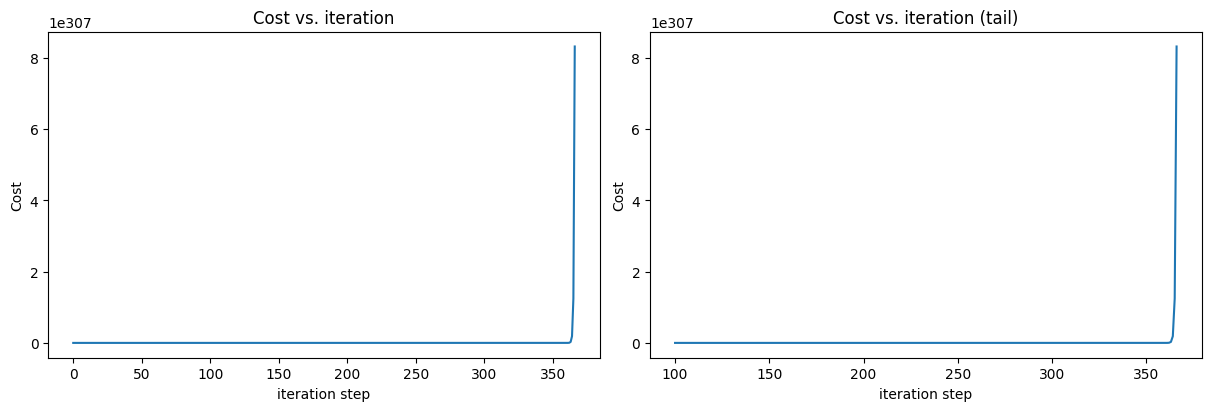

In [39]:
# plot cost versus iteration
fig, (ax1, ax2) = plt.subplots(1, 2, constrained_layout=True, figsize=(12, 4))
ax1.plot(J_hist)
ax2.plot(100 + np.arange(len(J_hist[100:])), J_hist[100:])
ax1.set_title("Cost vs. iteration");  ax2.set_title("Cost vs. iteration (tail)")
ax1.set_ylabel('Cost')             ;  ax2.set_ylabel('Cost')
ax1.set_xlabel('iteration step')   ;  ax2.set_xlabel('iteration step')
plt.show()